# **Recommendation system**

## **Introduction**

A recommender system, or a recommendation system (sometimes replacing 'system' with a synonym such as platform or engine), is a subclass of information filtering system that seeks to predict the "rating" or "preference" a user would give to an item. They are primarily used in commercial applications. [Source: Wikipedia](https://en.wikipedia.org/wiki/Recommender_system)

A Recommender System employs a statistical algorithm that seeks to predict users' ratings for a particular entity, based on the similarity between the entities or similarity between the users that previously rated those entities. The intuition is that similar types of users are likely to have similar ratings for a set of entities.

## **Types of Recommender Systems**
There are two major approaches to build recommender systems: Content-Based Filtering and Collaborative Filtering:

**Content-Based Filtering**

In content-based filtering, the similarity between different products is calculated on the basis of the attributes of the products. For instance, in a content-based movie recommender system, the similarity between the movies is calculated on the basis of genres, the actors in the movie, the director of the movie, etc.

**Collaborative Filtering**

Collaborative filtering leverages the power of the crowd. The intuition behind collaborative filtering is that if a user A likes products X and Y, and if another user B likes product X, there is a fair bit of chance that he will like the product Y as well.

Take the example of a movie recommender system. Suppose a huge number of users have assigned the same ratings to movies X and Y. A new user comes who has assigned the same rating to movie X but hasn't watched movie Y yet. Collaborative filtering system will recommend him the movie Y.

## **Dataset**
The dataset that we are going to use for this problem is the MovieLens Dataset. To download the dataset, go the [home](https://grouplens.org/datasets/movielens/latest/) page of the dataset and download the "ml-latest-small.zip" file, which contains a subset of the actual movie dataset and contains 100000 ratings for 9000 movies by 700 users.

Once we unzip the downloaded file, we will see "links.csv", "movies.csv", "ratings.csv" and "tags.csv" files, along with the "README" document.

## **Content-based recommender systems**

This type of filter does not involve other users if not ourselves. Based on what we like, the algorithm will simply pick items with similar content to recommend us.

A major drawback of this algorithm is that it is limited to recommending items that are of the same type. It will never recommend products which the user has not bought or liked in the past. So if a user has watched or liked only action movies in the past, the system will recommend only action movies. It’s a very narrow way of building an engine.

How to measure the similarity? there are different measures of similarity :

 1. Euclidean Distance
 2. Cosine similarity
 3. Pearson’s Correlation

we have already discussed these distance measures in detail in KNN section. 


## **Collaborative filtering based recommender systems**

The collaborative filtering algorithm uses “User Behavior” for recommending items. This is one of the most commonly used algorithms in the industry as it is not dependent on any additional information. There are different types of collaborating filtering techniques and we shall look at them in detail below.

### **User-User collaborative filtering**

This algorithm first finds the similarity score between users. Based on this similarity score, it then picks out the most similar users and recommends products which these similar users have liked or bought previously.

![Source-Medium](https://miro.medium.com/max/1400/0*Ie5IlEQGJH61y9Qa.png)

In terms of our movies example from earlier, this algorithm finds the similarity between each user based on the ratings they have previously given to different movies. The prediction of an item for a user u is calculated by computing the weighted sum of the user ratings given by other users to an item i.

The prediction Pu,i is given by:

$$P_{u,i} = \frac{\sum_v{(r_{v,i} * S_{u,v})}}{\sum_v S_{u,v}}$$

Here,

 + $P_{u,i}$ is the prediction of an item
 + $r_{v,i}$ is the rating given by a user v to a movie i
 + $S_{u,v}$ is the similarity between users

Let us understand it with an example.

|User\movie|x1|x2|x3|x4|x5|
|:-----:|:---:|:---:|:---:|:---:|:---:|
|A|4|1||4||
|B||4||2|3|
|C||1||4|4|

To understand this in a more practical manner, let’s find the similarity between users (A, C) and (B, C) in the above table using Pearson’s correlation. Common movies rated by A and C are movies x2 and x4 and by B and C are movies x2, x4 and x5. As per cosine formula:

$$r_{AC} = \frac{1*1+4*4}{\sqrt{(1^2+4^2)}\sqrt{(1^2+4^2)}} = 
            \frac{17}{17} = 
            1$$

$$r_{BC} = \frac{4*1+2*4+3*4}{\sqrt{(4^2+2^2+3^2)}\sqrt{(1^2+4^2+4^2)}} = 
            \frac{24}{30.94} = 
            0.78$$

The similarity between user A and C is more than the similarity between B and C. Hence users A and C have more similarity and the movies liked by user A will be recommended to user C and vice versa.

This algorithm is quite time consuming as it involves calculating the similarity for each user and then calculating prediction for each similarity score. One way of handling this problem is to select only a few users (neighbors) instead of all to make predictions, i.e. instead of making predictions for all similarity values, we choose only few similarity values. There are various ways to select the neighbors:

 + Select a threshold similarity and choose all the users above that value
 + Randomly select the users
 + Arrange the neighbors in descending order of their similarity value and choose top-N users
 + Use clustering for choosing neighbors
 
This algorithm is useful when the number of users is less. Its not effective when there are a large number of users as it will take a lot of time to compute the similarity between all user pairs. This leads us to item-item collaborative filtering, which is effective when the number of users is more than the items being recommended.




### **Item-Item collaborative filtering**

In this algorithm, we compute the similarity between each pair of items.

![Source:Medium](https://miro.medium.com/max/1400/0*KvDMDRObD1hdzIMZ.png)

So in our case we will find the similarity between each movie pair and based on that, we will recommend similar movies which are liked by the users in the past. This algorithm works similar to user-user collaborative filtering with just a little change — instead of taking the weighted sum of ratings of “user-neighbors”, we take the weighted sum of ratings of “item-neighbors”. The prediction is given by:

$$P_{u,i} = \frac{\sum_N (S_{i,N} * R_{u,N})}{\sum_N (|S_{i,N}|)}$$

Now we will find the similarity between items.

$$similarity_{cosine} = \cos\theta = \frac{A.B}{||A||||B||} = \frac{\sum_{i=1}^nA_iB_i}{\sqrt{\sum_{i=1}^n{A_i^2}}\sqrt{\sum_{i=1}^n{B_i^2}}}$$

Now, as we have the similarity between each movie and the ratings, predictions are made and based on those predictions, similar movies are recommended. Let us understand it with an example.

|User\movie|x1|x2|x3|x4|x5|
|:-----:|:---:|:---:|:---:|:---:|:---:|
|A|4|1|2|4|4|
|B|2|4|4|2|1|
|C||1||3|4|

Common users who have rated movies x1 and x4 are A and B while the users who have rated movies x1 and x5 are also A and B. As per cosine formula:

$$c_{14} = \frac{4*2+4*2}{\sqrt{(4^2+4^2)}\sqrt{(2^2+2^2)}} = 
            \frac{16}{16} = 
            1$$

$$c_{15} = \frac{4*2+4*1}{\sqrt{(4^2+4^2)}\sqrt{(2^2+1^2)}} = 
            \frac{12}{12.65} = 
            0.94$$

The similarity between movie x1 and x4 is more than the similarity between movie x1 and x5. So based on these similarity values, if any user searches for movie x1, they will be recommended movie x4 and vice versa.

In [2]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [6]:
import os

os.listdir("/content/drive/My Drive/Data_Science_Python/dataset")

['Movielens', 'house price', 'IRIS', 'Mall_Customers', 'titanic']

## **Example : Movie lens dataset**

### **Data Visualization and Preprocessing**

The first step in every data science problem is to visualize and preprocess the data. We will do the same, so let's first import the "ratings.csv" file and see what it contains. 

In [0]:
import os
os.chdir('/content/drive/My Drive/Data_Science_Python/dataset/Movielens/ml-100k')

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np 
%matplotlib inline

In [0]:
#Reading users file:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('u.user', sep='|', names=u_cols,encoding='latin-1')

#Reading ratings file:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
ratings = pd.read_csv('u.data', sep='\t', names=r_cols,encoding='latin-1')

#Reading items file:
i_cols = ['movie_id', 'movie title' ,'release date','video release date', 'IMDb URL', 'unknown', 'Action', 'Adventure',
'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 
'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

items = pd.read_csv('u.item', sep='|', names=i_cols,encoding='latin-1')

The dataset has already been divided into train and test by GroupLens where the test data has 10 ratings for each user, i.e. 9,430 rows in total. We will read both these files into our Python environment.

In [15]:
r_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']

ratings_train = pd.read_csv('ua.base', sep='\t', names=r_cols, encoding='latin-1')
ratings_test = pd.read_csv('ua.test', sep='\t', names=r_cols, encoding='latin-1')

ratings_train.shape, ratings_test.shape

((90570, 4), (9430, 4))

In [0]:
# create one merged DataFrame
def data_preprocessing(ratings_train):
  movie_ratings = pd.merge(ratings_train, items, on = 'movie_id', how = 'left')
  train = pd.merge(movie_ratings, users, on = 'user_id', how = 'left')
  return train

train = data_preprocessing(ratings_train)
test = data_preprocessing(ratings_test)

### **Exploratory data analysis**

#### **Glimpse of data**

In [17]:
# Shape of data
print("Number of rows and columns in train :", train.shape)
print("Number of rows and columns in test :", test.shape)

Number of rows and columns in train : (90570, 31)
Number of rows and columns in test : (9430, 31)


In [18]:
# Unique users and movies
print("Number of unique users in train :", len(train.user_id.unique().tolist()))
print("Number of unique movies in train :", len(train.movie_id.unique().tolist()))

Number of unique users in train : 943
Number of unique movies in train : 1680


In [19]:
# Top 5 rows of data
train.head()

,user_id,movie_id,rating,unix_timestamp,movie title,release date,video release date,IMDb URL,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,age,sex,occupation,zip_code
0,1,1,5,874965758,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,24,M,technician,85711
1,1,2,3,876893171,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,24,M,technician,85711
2,1,3,4,878542960,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,24,M,technician,85711
3,1,4,3,876893119,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,24,M,technician,85711
4,1,5,3,889751712,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,24,M,technician,85711


1. we have 90K ratings by 943 users for 1680 movies.

2. There are 19 columns specify the genre of a particular movie. These are binary columns, i.e., a value of 1 denotes that the movie belongs to that genre, and 0 otherwise.

#### **Understanding users profile**

##### **No of users by sex**

In [20]:
# No of users by sex
train.groupby('sex')['user_id'].nunique()

sex
F    273
M    670
Name: user_id, dtype: int64

##### **No of users by occupation**

In [21]:
# No of users by occupation
train.groupby('occupation')['user_id'].nunique()

occupation
administrator     79
artist            28
doctor             7
educator          95
engineer          67
entertainment     18
executive         32
healthcare        16
homemaker          7
lawyer            12
librarian         51
marketing         26
none               9
other            105
programmer        66
retired           14
salesman          12
scientist         31
student          196
technician        27
writer            45
Name: user_id, dtype: int64

##### **No of users by gender and occupation**

In [22]:
# No of users by occupation
train.groupby(['occupation', 'sex'])['user_id'].nunique()

occupation     sex
administrator  F       36
               M       43
artist         F       13
               M       15
doctor         M        7
educator       F       26
               M       69
engineer       F        2
               M       65
entertainment  F        2
               M       16
executive      F        3
               M       29
healthcare     F       11
               M        5
homemaker      F        6
               M        1
lawyer         F        2
               M       10
librarian      F       29
               M       22
marketing      F       10
               M       16
none           F        4
               M        5
other          F       36
               M       69
programmer     F        6
               M       60
retired        F        1
               M       13
salesman       F        3
               M        9
scientist      F        3
               M       28
student        F       60
               M      136
technician     F   

##### **No of users by zip**

In [23]:
# No of users by zip
train.groupby('zip_code')['user_id'].nunique()

zip_code
00000    2
01002    1
01040    1
01080    1
01331    1
        ..
V0R2M    1
V1G4L    1
V3N4P    1
V5A2B    1
Y1A6B    1
Name: user_id, Length: 795, dtype: int64

#### **Age wise distribution**

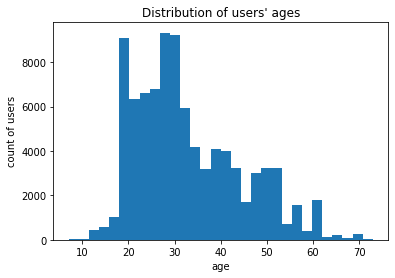

In [24]:
train.age.plot.hist(bins=30)
plt.title("Distribution of users' ages")
plt.ylabel('count of users')
plt.xlabel('age');

In [25]:
labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
train['age_group'] = pd.cut(train.age, range(0, 81, 10), right=False, labels=labels)
train.groupby('age_group').agg({'rating': [np.size, np.mean]})

rating          
            size      mean
age_group                 
0-9           33  3.787879
10-19       7421  3.482280
20-29      36215  3.458926
30-39      23286  3.551748
40-49      13341  3.589236
50-59       7764  3.624420
60-69       2353  3.661283
70-79        157  3.668790

In [26]:
# No of users by zip
train.groupby('age_group')['user_id'].nunique()

age_group
0-9        1
10-19     76
20-29    332
30-39    241
40-49    168
50-59     94
60-69     27
70-79      4
Name: user_id, dtype: int64

#### **Top 25 most rated movies**

In [27]:
# What are the 25 most rated movies?
most_rated = train.groupby('movie title').size().sort_values(ascending=False)[:25]
most_rated

movie title
Star Wars (1977)                             495
Fargo (1996)                                 443
Return of the Jedi (1983)                    439
Contact (1997)                               412
English Patient, The (1996)                  400
Liar Liar (1997)                             398
Toy Story (1995)                             392
Scream (1996)                                386
Independence Day (ID4) (1996)                384
Raiders of the Lost Ark (1981)               379
Godfather, The (1972)                        352
Silence of the Lambs, The (1991)             350
Pulp Fiction (1994)                          348
Air Force One (1997)                         347
Twelve Monkeys (1995)                        346
Jerry Maguire (1996)                         335
Empire Strikes Back, The (1980)              330
Chasing Amy (1997)                           322
Star Trek: First Contact (1996)              322
Rock, The (1996)                             320
Fugitive

### **Simple recommendation system**

As described in the previous section, simple recommenders are basic systems that recommends the top items based on a certain metric or score.

The following are the steps involved:

 + Decide on the metric or score to rate movies on.
 + Calculate the score for every movie.
 + Sort the movies based on the score and output the top results.

As **`ratings`** are already available, we are going to consider this as our metric for scoring the movies. However, using this metric has a few caveats. For one, it does not take into consideration the popularity of a movie. Therefore, a movie with a rating of 9 from 10 voters will be considered 'better' than a movie with a rating of 8.9 from 10,000 voters.

On a related note, this metric will also tend to favor movies with smaller number of voters with skewed and/or extremely high ratings. As the number of voters increase, the rating of a movie regularizes and approaches towards a value that is reflective of the movie's quality. It is more difficult to discern the quality of a movie with extremely few voters.

Taking these shortcomings into consideration, it is necessary that we come up with a weighted rating that takes into account the average rating and the number of votes it has garnered. For this, we are going to use weighted rating formula(as per IMDB) as your metric/score. Mathematically, it is represented as follows:

$$WR = (\frac{v}{v+m}.R) + (\frac{m}{v+m}.C)$$

where, 

 + v is the number of votes for the movie;
 + m is the minimum votes required to be listed in the chart;
 + R is the average rating of the movie; And
 + C is the mean vote across the whole report

At first, Let's calculate v and R for every movie from training datasets.

In [28]:
movie_stats = train.groupby('movie title').agg({'rating': [np.size, np.mean]}).reset_index()
movie_stats.columns = ['movie_title', 'rating_counts', 'ratings_avg']
movie_stats.head()

,movie_title,rating_counts,ratings_avg
0,'Til There Was You (1997),8,2.375000
1,1-900 (1994),5,2.600000
2,101 Dalmatians (1996),100,2.940000
3,12 Angry Men (1957),113,4.327434
4,187 (1997),38,3.026316


let's calculate the value of C, the mean rating across all movies:

In [29]:
# Calculate C
C = movie_stats['ratings_avg'].mean()
print(C)

3.0689285824680637


The average rating of a movie on is around 3.07, on a scale of 5.

Next, let's calculate the number of votes, $m$, received by a movie in the $90^{th}$ percentile.

In [30]:
# Calculate the minimum number of votes required to be in the chart, m
m = movie_stats['rating_counts'].quantile(0.90)
print(m)

153.0


Next, you can filter the movies that qualify for the chart, based on their vote counts:

In [31]:
# Filter out all qualified movies into a new DataFrame
q_movies = movie_stats.copy().loc[movie_stats['rating_counts'] >= m]
q_movies.shape

(168, 3)

We see that there are 168 movies which qualify to be in this list. Now, we need to calculate your metric for each qualified movie. To do this, we will define a function, `weighted_rating()` and define a new feature `score`, of which you'll calculate the value by applying this function to your DataFrame of qualified movies.

Finally, let's sort the DataFrame based on the `score` feature and output the title, vote count, vote average and weighted rating or score of the top 15 movies.


In [0]:
# Function that computes the weighted rating of each movie
def weighted_rating(x, m=m, C=C):
    v = x['rating_counts']
    R = x['ratings_avg']
    # Calculation based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [33]:
# Define a new feature 'score' and calculate its value with `weighted_rating()`
q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

#Sort movies based on score calculated above
q_movies = q_movies.sort_values('score', ascending=False)

#Print the top 15 movies
q_movies[['movie_title', 'rating_counts', 'ratings_avg', 'score']].head(15)

,movie_title,rating_counts,ratings_avg,score
1397,Star Wars (1977),495,4.365657,4.059485
1280,Schindler's List (1993),269,4.475836,3.965749
1316,"Shawshank Redemption, The (1994)",258,4.457364,3.940501
1328,"Silence of the Lambs, The (1991)",350,4.311429,3.933491
1204,Raiders of the Lost Ark (1981),379,4.255937,3.914560
611,"Godfather, The (1972)",352,4.267045,3.904052
273,Casablanca (1942),224,4.459821,3.895348
1570,"Usual Suspects, The (1995)",251,4.386454,3.887490
497,Fargo (1996),443,4.148984,3.871722
456,"Empire Strikes Back, The (1980)",330,4.212121,3.849992


### **Content-Based Recommender**

In [34]:
train_flag = train[['movie_id']].drop_duplicates()
train_flag['flag'] = 'train'

items = pd.merge(items, train_flag, on = 'movie_id', how = 'left')
items_v2 = items[items['flag'] == 'train']
items_v2 = items_v2.drop(['movie_id', 'release date', 'video release date', 'IMDb URL', 'flag'], axis = 1)
items_v2.head()

,movie title,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,Toy Story (1995),0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,GoldenEye (1995),0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Four Rooms (1995),0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Get Shorty (1995),0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Copycat (1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [0]:
# Create a new dataframe without the movie title.
items_v3 = items_v2.drop('movie title', 1)

In [36]:
items_v3.head()

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [0]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy import sparse

# As a first step we normalize the user vectors to unit vectors.
movie_title = items_v2['movie title'].tolist()
# magnitude = np.sqrt(np.square(items_v3).sum(axis=1))
# items_v3 = items_v3.divide(magnitude, axis='index')

def calculate_similarity(items_v3):
    """Calculate the column-wise cosine similarity for a sparse
    matrix. Return a new dataframe matrix with similarities.
    """
    data_sparse = sparse.csr_matrix(items_v3)
    #similarities = cosine_similarity(data_sparse.transpose())
    similarities = cosine_similarity(data_sparse)
    sim = pd.DataFrame(data=similarities, index= movie_title, columns= movie_title)
    return sim

# Build the similarity matrix
item_matrix = calculate_similarity(items_v3)

In [38]:
# Lets get the top 11 similar artists for Toy Story
print (item_matrix.loc['Star Wars (1977)'].nlargest(11))

Star Wars (1977)                                 1.000000
Return of the Jedi (1983)                        1.000000
Empire Strikes Back, The (1980)                  0.912871
Starship Troopers (1997)                         0.894427
African Queen, The (1951)                        0.894427
Stargate (1994)                                  0.774597
Jurassic Park (1993)                             0.774597
Independence Day (ID4) (1996)                    0.774597
Star Trek: First Contact (1996)                  0.774597
Star Trek VI: The Undiscovered Country (1991)    0.774597
Star Trek: The Wrath of Khan (1982)              0.774597
Name: Star Wars (1977), dtype: float64


In [0]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(items_v3, title):
    # Get the index of the movie that matches the title
    # Build the similarity matrix
    item_matrix = calculate_similarity(items_v3)

    # Finding user
    # Top 10 similar movies
    top10 = item_matrix.loc[title].nlargest(11)

    top10 = top10.iloc[1:]
    return top10

In [40]:
get_recommendations(items_v3, 'Godfather, The (1972)')

Godfather: Part II, The (1974)    1.000000
Menace II Society (1993)          1.000000
Dead Presidents (1995)            1.000000
Lashou shentan (1992)             1.000000
Batman (1989)                     0.866025
Best Men (1997)                   0.866025
Pulp Fiction (1994)               0.816497
Carlito's Way (1993)              0.816497
GoodFellas (1990)                 0.816497
Donnie Brasco (1997)              0.816497
Name: Godfather, The (1972), dtype: float64

### **Collaborative filtering**

In [0]:
n_users = ratings.user_id.unique().shape[0]
n_items = ratings.movie_id.unique().shape[0]

In [0]:
data_matrix = np.zeros((n_users, n_items))
for line in ratings.itertuples():
    data_matrix[line[1]-1, line[2]-1] = line[3]

In [0]:
from sklearn.metrics.pairwise import pairwise_distances 
user_similarity = pairwise_distances(data_matrix, metric='cosine')
item_similarity = pairwise_distances(data_matrix.T, metric='cosine')

In [0]:
def predict(ratings, similarity, type='user'):
    
    if type == 'user':
        mean_user_rating = ratings.mean(axis=1).reshape(-1,1)
        #We use np.newaxis so that mean_user_rating has same format as ratings
        
        ratings_diff = (ratings - mean_user_rating)
        pred = mean_user_rating + similarity.dot(ratings_diff) / np.array([np.abs(similarity).sum(axis=1)]).T
    
    elif type == 'item':
        pred = ratings.dot(similarity) / np.array([np.abs(similarity).sum(axis=1)])
    
    return pred

In [0]:
user_prediction = predict(data_matrix, user_similarity, type='user')
item_prediction = predict(data_matrix, item_similarity, type='item')

In [47]:
temp = pd.DataFrame(user_prediction)
temp

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,1642,1643,1644,1645,1646,1647,1648,1649,1650,1651,1652,1653,1654,1655,1656,1657,1658,1659,1660,1661,1662,1663,1664,1665,1666,1667,1668,1669,1670,1671,1672,1673,1674,1675,1676,1677,1678,1679,1680,1681
0,2.065326,0.734303,0.629924,1.010669,0.640686,0.476150,1.784569,1.163032,1.513350,0.704478,1.174794,1.413184,0.965182,1.091815,1.476095,0.502777,0.632194,0.412363,0.656087,0.614663,0.600672,1.480883,1.047454,0.924635,1.353350,0.607237,0.536511,1.338769,0.649270,0.516856,0.855687,0.647217,0.666883,0.404232,0.413512,0.415030,0.403375,0.702957,0.622120,0.530070,...,0.405257,0.394286,0.394179,0.397884,0.393373,0.392566,0.393373,0.394179,0.394179,0.396771,0.397475,0.392011,0.392330,0.397685,0.393028,0.400576,0.391760,0.392567,0.391843,0.397298,0.393479,0.403465,0.393479,0.393479,0.394742,0.394742,0.393479,0.394742,0.392295,0.394606,0.394041,0.394434,0.393981,0.392972,0.393344,0.392272,0.394909,0.393590,0.393049,0.392771
1,1.763088,0.384040,0.196179,0.731538,0.225643,0.003892,1.493597,0.876153,1.108467,0.261991,0.908393,1.188159,0.543799,0.628333,1.062172,0.033810,0.230766,-0.060399,0.166967,0.153213,0.163744,1.280909,0.743765,0.555522,0.943410,0.181471,0.107742,1.125325,0.253732,0.073395,0.527273,0.247614,0.286863,-0.070263,-0.061613,-0.059934,-0.069883,0.316935,0.225324,0.093728,...,-0.074737,-0.087391,-0.086403,-0.083143,-0.087352,-0.088301,-0.087352,-0.086403,-0.086403,-0.085151,-0.085066,-0.089236,-0.088018,-0.083219,-0.086702,-0.082744,-0.089151,-0.088102,-0.089130,-0.085365,-0.088340,-0.077097,-0.088340,-0.088340,-0.087410,-0.087410,-0.088340,-0.087410,-0.089249,-0.085907,-0.086942,-0.085491,-0.087137,-0.088158,-0.087298,-0.089288,-0.087468,-0.088378,-0.086918,-0.086712
2,1.795904,0.329047,0.158829,0.684154,0.173277,-0.035621,1.488230,0.835769,1.135426,0.236383,0.855313,1.142086,0.551344,0.665186,1.083008,-0.002216,0.174483,-0.106896,0.162049,0.130297,0.118480,1.219423,0.691106,0.521190,0.975617,0.139300,0.055978,1.071484,0.198739,0.026513,0.477767,0.201556,0.230600,-0.118088,-0.111001,-0.107308,-0.118494,0.261795,0.173630,0.045676,...,-0.122798,-0.135665,-0.134167,-0.131299,-0.135182,-0.136198,-0.135182,-0.134167,-0.134167,-0.132855,-0.133271,-0.137296,-0.136132,-0.131219,-0.134826,-0.129735,-0.137143,-0.136057,-0.137092,-0.133958,-0.136680,-0.125791,-0.136680,-0.136680,-0.135906,-0.135906,-0.136680,-0.135906,-0.137447,-0.134114,-0.134795,-0.133537,-0.135543,-0.136438,-0.135041,-0.137611,-0.136374,-0.136992,-0.134969,-0.134765
3,1.729951,0.293913,0.127741,0.644932,0.142143,-0.062261,1.437010,0.796249,1.096663,0.211789,0.802782,1.101235,0.519041,0.634565,1.034155,-0.028821,0.144264,-0.133168,0.133852,0.104723,0.087730,1.167898,0.656306,0.482979,0.930018,0.111579,0.026274,1.022960,0.165697,-0.000102,0.441035,0.173451,0.198041,-0.144529,-0.138049,-0.133841,-0.144914,0.228242,0.143876,0.017009,...,-0.148624,-0.161708,-0.160456,-0.157200,-0.161511,-0.162565,-0.161511,-0.160456,-0.160456,-0.159123,-0.159116,-0.163706,-0.162572,-0.156666,-0.161386,-0.155200,-0.163584,-0.162494,-0.163558,-0.159643,-0.162763,-0.151450,-0.162763,-0.162763,-0.161807,-0.161807,-0.162763,-0.161807,-0.163805,-0.160364,-0.161413,-0.160220,-0.161542,-0.162586,-0.161634,-0.163877,-0.162283,-0.163080,-0.161442,-0.161248
4,1.796651,0.454474,0.354422,0.763130,0.359539,0.195987,1.547370,0.908904,1.292027,0.437954,0.939055,1.207069,0.722153,0.856009,1.214897,0.224767,0.350116,0.125841,0.391883,0.351104,0.303414,1.243189,0.811988,0.649332,1.087206,0.337312,0.254416,1.086780,0.355847,0.239699,0.599368,0.388039,0.394022,0.114831,0.119991,0.125638,0.113661,0.417787,0.350079,0.238396,...,0.113724,0.102157,0.102678,0.106639,0.101676,0.100674,0.101676,0.102678,0.102678,0.104495,0.104957,0.099710,0.100340,0.105855,0.100816,0.109687,0.099565,0.100459,0.099427,0.104878,0.101155,0.111929,0.101155,0.101155,0.102398,0.102398,0.101155,0.102398,0.099947,0.102755,0.101

# **Reference**

1. [stackabuse](https://stackabuse.com/creating-a-simple-recommender-system-in-python-using-pandas/)

2. [heartbeat](https://heartbeat.fritz.ai/recommender-systems-with-python-part-i-content-based-filtering-5df4940bd831)

3. [Datacanp](https://www.datacamp.com/community/tutorials/recommender-systems-python)